# 🏂 Holt Winters Model (Linear Version)
Hey!! <br>
This is the **Hold Model**. At least the *starting* version of it. You know, you were used to *freak out* by reading this H O L T name? But after learning the nitty gritty of it, it is like a toy which was waiting for me to get un-wrapped.

Here, we are on the **Trend, But no Seasonality** type of situation unlike SES where there was *no trend* and *no seasonality* either.

### 🤷‍♂️ But why Winters?
Now obviously you will get this doubt that *there can be a name like **holt** but, what about **winters** part? Does that show some kind of seasonality*? Hah, looking on the internet:

> Holt-Winter's Exponential Smoothing as named after its **two contributors**: Charles ***Holt*** and Peter ***Winter's*** is one of the oldest time series analysis techniques which takes into account the trend and seasonality while doing the forecasting.

અરે યાર, winters કોઈનો નામ પણ હોય! 🙄

### 

### 🕶 Revision of SES
Recall that in SES, we used total of **`2`** models.

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t $$

#### 2️⃣ Smoothing Equation
# $$l_t = \alpha y_t + (1 - \alpha)l_{t - 1}$$

It was where, the 1️⃣ is the **actual** equation which will **give the final** result and 2️⃣ was the **underlying** equation which calculates the stuff. And that we called the level. **And that,** level ***is*** the **intercept**.

###### 

### ⛄ Getting Started with Holt Winters
Here, we have the same thing as SES just that it **has one more number to learn** which is **the trend**. This model will return the trend line which can go in any direction instead of simply the flat-horizontal simple line seen in SES.

And a line? Well... ***how to draw a freakin' line?***

Man! It is the same as **linear regression**!! As just we know how to calculate the **intercept** (level) now just we will need to learn about learning the **slope** (trend). That's it. And that will be our 3️⃣ equation. 

Of course the equations will change slightly, but not much. Let's get to them step-by-step.

###### 

### ❄ Model in the component form

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t + (b_t \times h) $$

- Look at the equation, doesn't that look familiar? It is! It is the same as for the line in the linear regression: $\hat y = \beta_0 + (\beta_1 \times x_i)$.
- So, that's the little change in the things that we care about. As instead of the simple horizontal line, we now have the essence of the trend (overall).
- $l_t:$ represents the **level** (intercept)
- $b_t:$ represents the **trend** (slope)
- $h:$ represents `th` point in the future to predict 1, 2, 3, ...

#### 2️⃣ Level Equation
# $$l_t = \alpha y_t + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

- Just try to compare it with the previous SES version of the equation: $l_t = \alpha y_t + (1 - \alpha)l_{t - 1}$
- The thing is the same, the *later part* on the right side shows the smoothed version of the previous value, but **since** we are using more than 1 component in the model (which is a trend as well), we would now have to add that.
- And **note that** the $(l_{t - 1} + b_{t - 1})$ ***is actually*** $(l_{t - 1} + (b_{t - 1} \times 1))$ or say `h = 1` one point ahead in time — and since 1 has no meaning, we will remove it.

#### 3️⃣ Trend Equation
# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

- We are **still using** the same form of the equation but with *slight* modification according to the model.
- The story of $(l_t - l_{t - 1})$
    - We find the slope generally with $\frac{l_t - l_{t - 1}}{1}$
    - $l_t:$ the value of current time
    - $l_{t - 1}:$ the value of previous time
    - Where the `1` in the denomenator represents the time frame — period
    - Just learning the slope in the gap of 1 day, 1 month... it is 1.
    - So that can be removed from the equation.
- We are taking the slope of single-single data into account to build the general trend.

### 

## 👓 Holt in Action

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

from statsmodels.tsa.holtwinters import Holt

In [2]:
# Reading the same data
passengers = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)
passengers.index.freq = "MS"

In [8]:
train = passengers["Passengers"].iloc[:-12] # Leaving last 12 months for testing
test = passengers["Passengers"].iloc[-12:] # Taking last 12 months for testing

In [9]:
# Building the model
holt = Holt(train, initialization_method="legacy-heuristic")

In [10]:
holt

In [17]:
# Note that we are nither giving the alpha nor the optimize
# as we want to get the minimized error
results = holt.fit()

In [18]:
results.params

{'smoothing_level': 0.9950719513349672,
 'smoothing_trend': 0.004467242315395386,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.91240163727467,
 'initial_trend': 2.5655284214159795,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [19]:
start =  train.index[0]
till =  test.index[-1]
print("START: ", start)
print("TILL: ", till)
passengers["HOLT"] = results.predict(start, till)

START:  1949-01-01 00:00:00
TILL:  1960-12-01 00:00:00


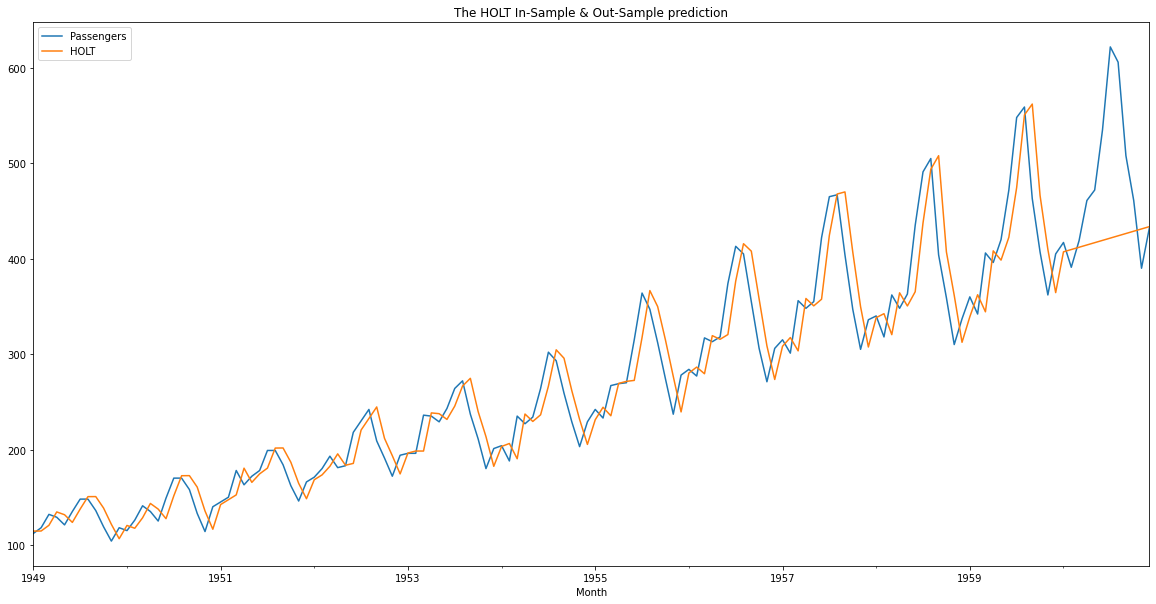

In [20]:
passengers[["Passengers", "HOLT"]].plot()
plt.title("The HOLT In-Sample & Out-Sample prediction");

getting the same alpha($\alpha$) : `0.995` **&** also the beta($\beta$) : `0.004`.

And, the real numbers that will be used in will be: 
- Level ($l_t$): `111.950`
- Trend ($b_t$): `1.473`

##### 

### 😋 Let's do it manually

I really was struggling with **how to initialize** the values of $l_t$ and $b_t$ but finally got the answers from this amazing video from [YouTube](https://www.youtube.com/watch?v=x-hxg4pE-Ns&ab_channel=LeslieMajor) where she explains neatly and your query on "*How to initialize*" will be solved in very first minute.

#### Initialization of params
Before this, in the simple SES model, we took the **last value *itself*** but here, things are a *bit* more involved. So we will have to take care of the *trend* as well... and hence there should be a method to ***correctly*** initialize the parameters.

**NOTE**: that we are not going to look at *how the values of $\alpha$ and $\beta$* are assigned. They have to get optimized and also for them to get optimized we will have to start from somewhere. And then there is whole another story of optimizing, but we don't want to go there yet. We can use the ***already*** optimized $\alpha$ and $\beta$ values from the model. So, we will use them 😉

> **Optimized values**: The values if we use them other then other possible values in the range, we will get the low error in the data. Yeah, the same thing we do in the other ML problems.

#### How To
- For $l_t$, we will use the $2^{nd}$ value from the time-series.
- For $b_t$, we will take the difference between $2^{nd}$ day and $1^{st}$ day from the time-series.

In [112]:
# Initialization
alpha = 0.9950208833037283
beta = 0.0042554614726079635

lts = [train.iloc[1]]
bts = [train.iloc[1] - train.iloc[0]]

In [113]:
print("Lts: ", lts)
print("Bts: ", bts)

Lts:  [118]
Bts:  [6]


In [114]:
train.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: Passengers, dtype: int64

###### 

Now, let's formulate the equations...

- $l_t = \alpha y_t + (1 - \alpha)(l_{t - 1} + b_{t - 1})$

- $b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$

In [115]:
# forecasts is just the `linear regression` like equation 1️⃣
forecasts = [] 

# The first prediction (h=1 and then just the addition; remember?)
forecasts.append(lts[-1] + bts[-1]) 

In [116]:
forecasts

[124]

So, now we have our all 3 equations 1️⃣, 2️⃣, 3️⃣ initialized! **Let's shoot!**

In [117]:
# We will start the prediction from the 3rd day... okay? Hence [2:]:
for yt in train.iloc[2:]:
    lt = (alpha * yt) + ((1 - alpha) * (lts[-1] + bts[-1]))
    bt = (beta * (lt - lts[-1])) + ((1 - beta) * bts[-1])
    forecast = lt + bt # Still we are not predicting in the future!
    
    lts.append(lt)
    bts.append(bt)
    forecasts.append(forecast)

In [121]:
passengers.loc[train.index[1:], "My Holts"] = forecasts

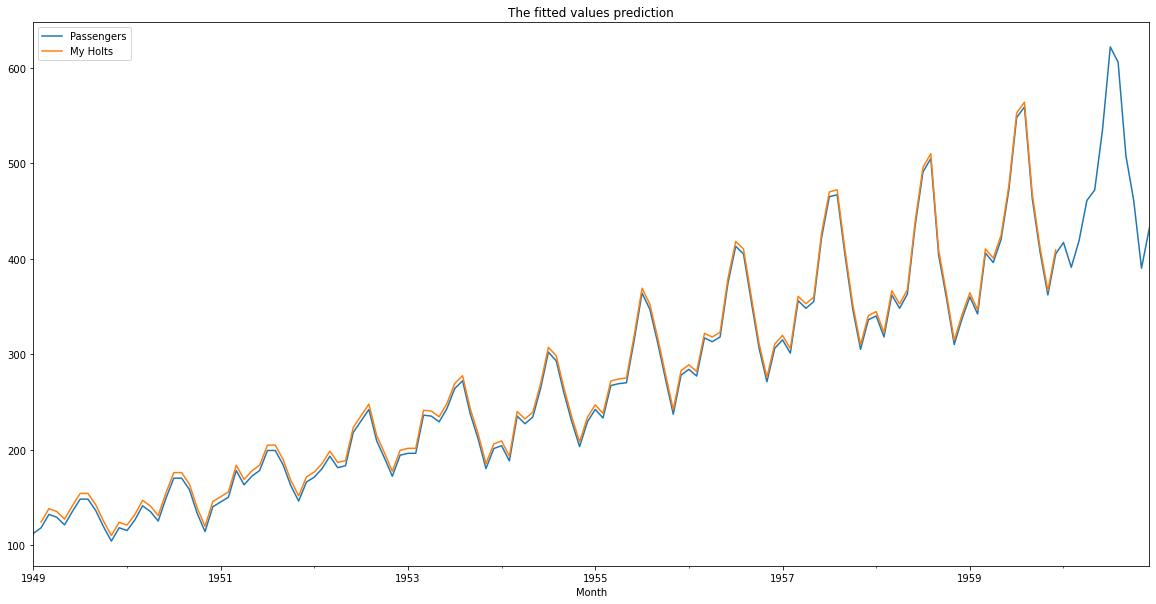

In [125]:
passengers[["Passengers", "My Holts"]].plot()
plt.title("The fitted values prediction");

Right? Just for now... we have taken the fitted values prediction... let'd go for ***real forecast***.

In [126]:
new_forecast = []
for h in range(1, 13):
    lt = (alpha * yt) + ((1 - alpha) * (lts[-1] + bts[-1]))
    bt = (beta * (lt - lts[-1])) + ((1 - beta) * bts[-1])
    forecast = lt + (bt * h)
    
    new_forecast.append(forecast)

In [127]:
passengers.loc[test.index, "My Holts"] = new_forecast

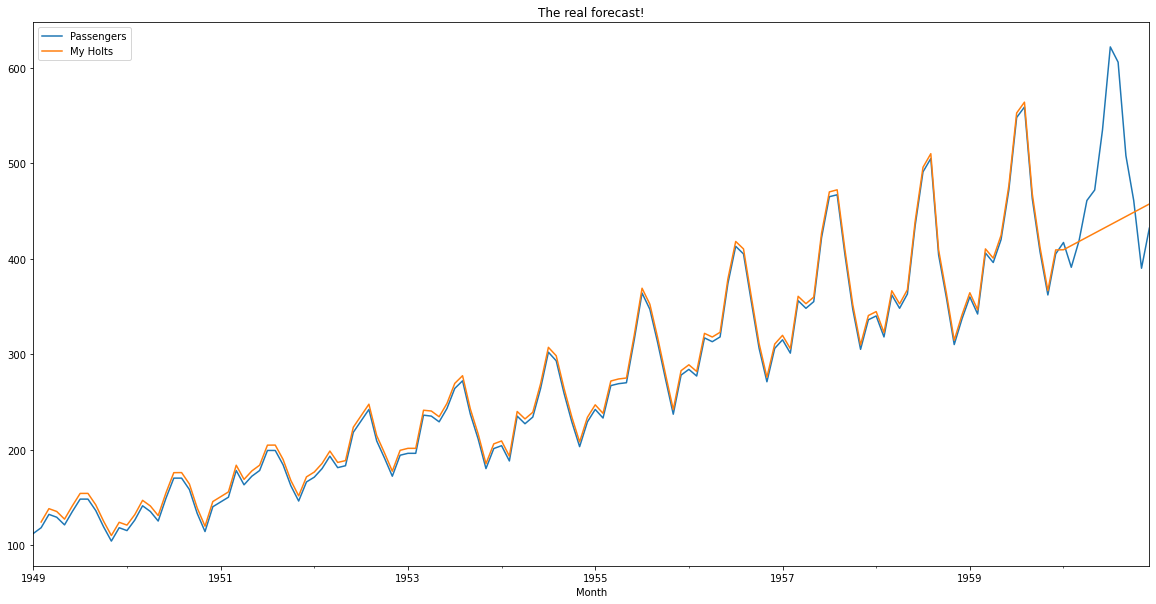

In [129]:
passengers[["Passengers", "My Holts"]].plot()
plt.title("The real forecast!");

# 🎉 AMAZING!